# This notebook aims to tackle the problem of undistort and transform the perspective of an image coming from a car's camera

**Author:** Marcelo Garcia

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## The following represents the output perspective we want to get given the original image
![](undist-and-warp.png)

### The pipeline is presented below:

In [2]:
def corners_unwarp(img, nx, ny, mtx, dist):
    """ This function gets an image and 
    # It applies the following steps:
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    """
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    dst_gray = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    img_size = (dst_gray.shape[1], dst_gray.shape[0]) # getting image size
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(dst_gray, (nx,ny), None)
    # 4) If corners found: 
    if ret == True:
    # a) draw corners
        cv2.drawChessboardCorners(undist, (8,6), corners, ret)
    # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        ind_left_top_corner = 0
        ind_right_top_corner = nx-1
        ind_left_bot_corner = nx*(ny-1)
        ind_right_bot_corner = nx*ny-1
        src = np.float32([corners[ind_left_top_corner],corners[ind_right_top_corner],
                          corners[ind_left_bot_corner],corners[ind_right_bot_corner]])
    # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        # since we don't know the exact location we can find it visuallly
        # To do this we will set a rectangle modified by an offset
        offset = 100; #pixels
        img_leftTop_corner = [offset,offset]
        img_rightTop_corner = [img_size[0]-offset,offset]
        img_leftBot_corner = [offset,img_size[1]-offset]
        img_rightBot_corner = [img_size[0]-offset,img_size[1]-offset]
        
        dst = np.float32([img_leftTop_corner,img_rightTop_corner,img_leftBot_corner,img_rightBot_corner])
        
    # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
    # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undist,M,img_size)

    return warped, M

### Testing the corners_unwarp function:

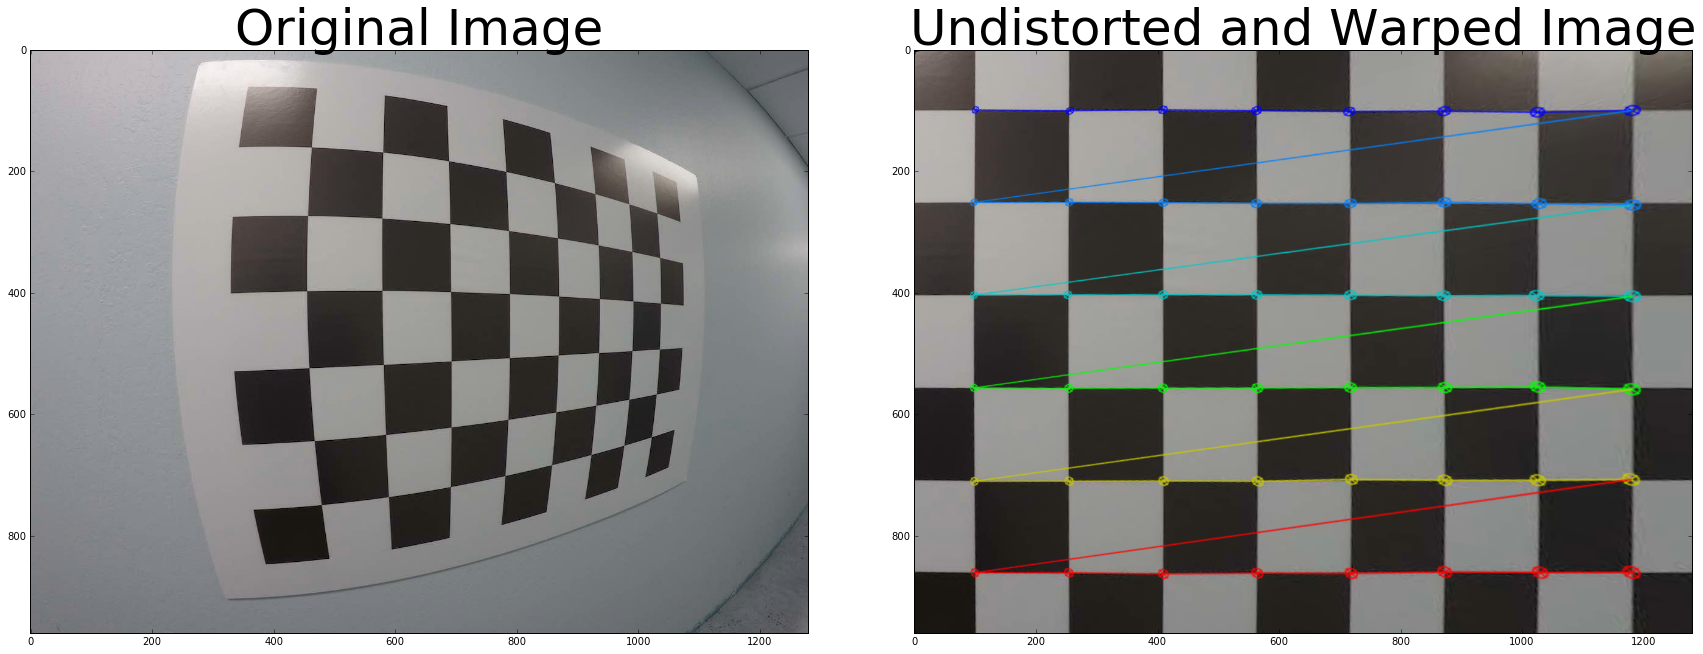

In [3]:
# Displaying the results for a test image
 # Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
# This was done previously in the following repository: 
#         https://github.com/CheloGE/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"] # camera matrix
dist = dist_pickle["dist"] #distortion coefficients

 # Plotting
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)